<a href="https://colab.research.google.com/github/DWA-GIT/TESI-UNIFACISA/blob/master/Regress%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação** 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

**Leitura dos dados**

In [6]:
uri = 'https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/regressao_linear_alura.csv'
movies = pd.read_csv(uri)
movies.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


**Forma do dataset**

In [7]:
movies.shape

(9125, 4)

**Separar em Feature(X) e Label(Y)**

In [0]:
X = movies['Investimento (em milhoes)']
Y = movies['Bilheteria (pessoas)']

**Ver graficamente**

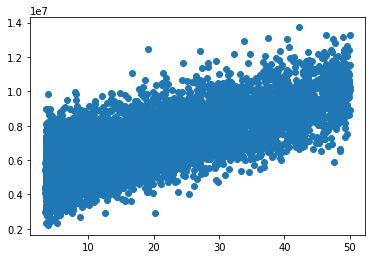

In [10]:
plt.scatter(X, Y)

**Criar grafico por amostragem dos dados**

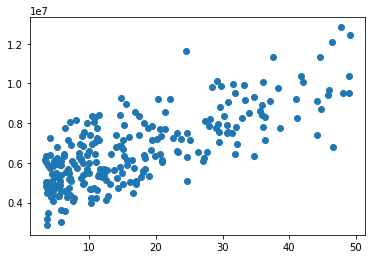

In [13]:
sample = movies.sample(n=250)

X = sample['Investimento (em milhoes)']
Y = sample['Bilheteria (pessoas)']

plt.scatter(X, Y)

**Modelo de regressão**

In [31]:
filmes_investimento = movies['Investimento (em milhoes)']
filmes_bilheteria = movies['Bilheteria (pessoas)']
type(filmes_investimento)
filmes_investimento.head(10)

0    11.048216
1    14.927678
2    27.114597
3     4.994242
4    19.142246
5     9.977311
6    14.257461
7     8.871800
8    29.112800
9     3.695241
Name: Investimento (em milhoes), dtype: float64

In [30]:
type(filmes_bilheteria)
filmes_bilheteria.head(10)

0    5623234.602
1    5714951.757
2    9524339.124
3    6331568.779
4    6409617.277
5    4956557.317
6    4654565.066
7    3950017.325
8    6850971.551
9    5157865.850
Name: Bilheteria (pessoas), dtype: float64

**Quebra de dados**

In [24]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_investimento, filmes_bilheteria)
print('Tamanho treino: {0} ,Tamanho teste: {1}, Total:{2} ({0} + {1})'.format(len(treino), len(teste), len(filmes_investimento)))

Tamanho treino: 6843 ,Tamanho teste: 2282, Total:9125 (6843 + 2282)


**Forçando a conversão de dados**

In [0]:
treino = np.array(treino).reshape(len(treino),1)
type(treino)
treino.size

In [0]:
teste = np.array(teste).reshape(len(teste),1)
type(teste)


In [0]:

treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria),1)
teste_bilheteria = np.array(teste_bilheteria).reshape(len(teste_bilheteria),1)


**Finalmente o modelo**

In [0]:
modelo = LinearRegression()
modelo.fit(treino, treino_bilheteria)
modelo

In [46]:
modelo.intercept_

array([5045053.57289303])

In [48]:
modelo.coef_

array([[99131.4486177]])

**Prevendo o valor de um filme**

In [49]:
movies.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


In [54]:
previsao_jumanji = modelo.predict([[14.927678]])
previsao_jumanji

previsao_jumanji_nova_forma = (modelo.coef_ * 14.927678) + modelo.intercept_
previsao_jumanji_nova_forma

array([[6524855.91753163]])